In [ ]:
import os 

nueva_ruta = r"C:\Users\Luis\Documents\GitHub\TFM_KSCHOOL\Luis\PreModelado_TFM_Palas\Noviembre\PreModelado_Palas"
os.chdir(nueva_ruta)
print("Nueva ruta actual:", os.getcwd())


Nueva ruta actual: C:\Users\Luis\Documents\GitHub\TFM_KSCHOOL\Luis\PreModelado_TFM_Palas\Noviembre\PreModelado_Palas


In [2]:
import pandas as pd

df_form = pd.read_csv('df_scaled_formularios.csv')
df_palas = pd.read_csv('df_scaled_palas.csv')

# Verificar la carga
print(df_form.head())
print(df_palas.head())


   Score_Lesion  Score_Nivel
0      0.253731     0.111111
1      0.216418     0.111111
2      0.201493     0.111111
3      0.253731     0.111111
4      0.216418     0.111111
                         Palas  Precio        Marca            Color  Balance  \
0              HARLEM EUPHORIA   63.95      No data     negro, verde        0   
1    VARLION LW DIFUSOR W 2021  149.95      varlion      negro, rosa        1   
2  DUNLOP BOOST LITE 2.0 WOMAN  109.00  black crown      negro, azul        1   
3    BLACK CROWN PITON 11 2023   86.95       dunlop             rosa        1   
4           SIUX FURTIVE PRO 2   62.95         siux  negro, amarillo        2   

   Nucleo  Cara  Dureza  Nivel de Juego  Forma  Superficie  Tipo de Juego  \
0       4     0       0               2      0           1              0   
1       4     0       0               2      1           2              0   
2       2     2       0               2      1           1              1   
3       4     1       1        

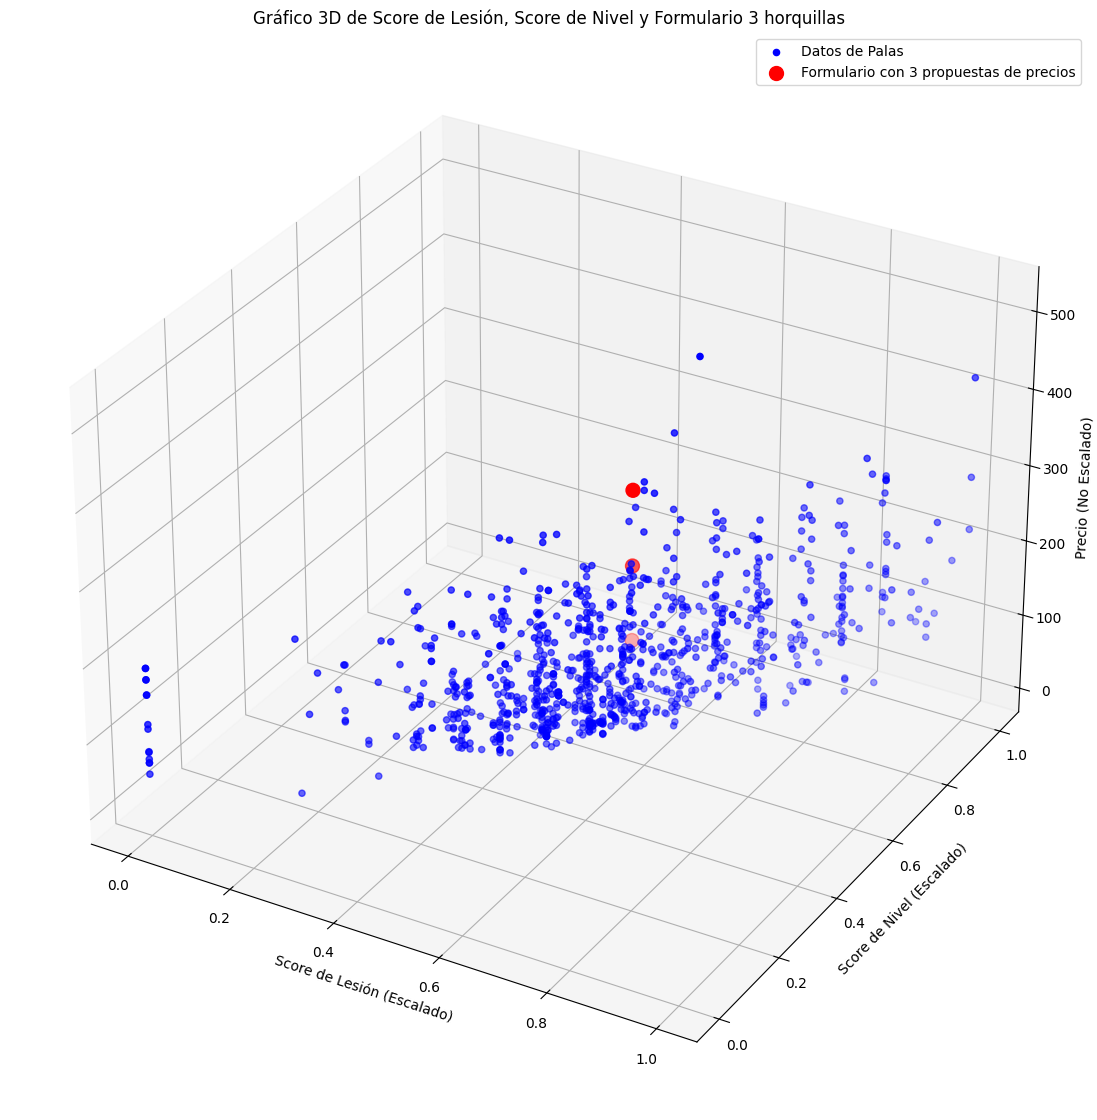

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random

# Seleccionar una fila aleatoria de df_form
random_row = df_form.sample(1).iloc[0]

# Extraer las coordenadas X e Y de la fila aleatoria
x_random = random_row['Score_Lesion']
y_random = random_row['Score_Nivel']

# Valores Z fijos para los tres puntos
z_random = [100, 200, 300]

# Crear figura
fig = plt.figure(figsize=(20, 14))

# Crear un gráfico en 3D
ax = fig.add_subplot(111, projection='3d')

# Definir los valores de cada eje para el DataFrame principal (df_palas)
x = df_palas['score_lesion']
y = df_palas['score_nivel']
z = df_palas['Precio']  # Eje Z para df_palas

# Crear el gráfico de dispersión 3D para df_palas
ax.scatter(x, y, z, color='blue', label='Datos de Palas')

# Crear los puntos adicionales
ax.scatter([x_random] * len(z_random), [y_random] * len(z_random), z_random, 
           color='red', s=100, label='Formulario con 3 propuestas de precios')

# Añadir etiquetas a los ejes
ax.set_xlabel('Score de Lesión (Escalado)')
ax.set_ylabel('Score de Nivel (Escalado)')
ax.set_zlabel('Precio (No Escalado)')

# Título del gráfico
ax.set_title('Gráfico 3D de Score de Lesión, Score de Nivel y Formulario 3 horquillas')

# Añadir leyenda para diferenciar los conjuntos de puntos
ax.legend()

# Mostrar el gráfico
plt.show()


In [12]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

# Crear los puntos de referencia con sus coordenadas X, Y, Z
reference_points = pd.DataFrame({
    'score_lesion': [x_random] * 3,
    'score_nivel': [y_random] * 3,
    'Precio': [100, 200, 300]
})

# Preparar los datos de df_palas para aplicar kNN
# Aseguramos que 'Palas' esté en el DataFrame para poder recuperar los nombres
palas_data = df_palas[['score_lesion', 'score_nivel', 'Precio', 'Palas']].copy()

# Entrenar el modelo kNN con las columnas relevantes (sin la columna 'Palas')
knn = NearestNeighbors(n_neighbors=3)
knn.fit(palas_data[['score_lesion', 'score_nivel', 'Precio']])

# Encontrar los 3 vecinos más cercanos para cada punto de referencia
results = {}
for index, point in reference_points.iterrows():
    distances, indices = knn.kneighbors([point])
    closest_points = palas_data.iloc[indices[0]]
    results[f'Punto {point["Precio"]}'] = closest_points

# Mostrar los resultados con los nombres de las palas
for key, value in results.items():
    print(f"Vecinos más cercanos a {key}:")
    print(value[['Palas', 'score_lesion', 'score_nivel', 'Precio']], "\n")


Vecinos más cercanos a Punto 100.0:
                         Palas  score_lesion  score_nivel  Precio
315        SIUX LIBERTY HYBRID      0.615385     0.557587   99.95
578           SIUX SUBZERO 2.0      0.500000     0.531993   99.95
384  BULLPADEL ELITE LIGHT FIP      0.692308     0.674589   99.95 

Vecinos más cercanos a Punto 200.0:
                              Palas  score_lesion  score_nivel  Precio
48   BLACK CROWN HURRICANE 2.0 2023      0.661538     0.612431  200.00
491       ADIDAS METALBONE 3.2 2023      0.673077     0.674589  199.95
299         ENEBE SPITFIRE 12K 2024      0.500000     0.504570  199.95 

Vecinos más cercanos a Punto 300.0:
                                               Palas  score_lesion  \
854                               LOK MAXX FLOW 2024      0.653846   
217  ADIDAS CROSS IT LIGHT PRO EDT BY MARTITA ORTEGA      0.692308   
895                               LOK MAXX HYPE 2024      0.884615   

     score_nivel  Precio  
854     0.619744  300.00  
217  

C:\Users\Luis\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
